<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_15_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98%2C_%EC%B5%9C%EC%A0%81%ED%99%94%ED%95%A8%EC%88%98_%EB%B9%84%EA%B5%90_(%ED%8C%A8%EC%85%98%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [3]:
data = fashion_mnist.load_data()
data

4423680/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
X_train = data[0][0]  # X_train
y_train = data[0][1]  # y_train
X_test = data[1][0]  # X_test
y_test = data[1][1]  # y_test

In [5]:
print(X_train.shape)  # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_train.shape)
print(X_test.shape)   # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [7]:
y_train_one_hot.shape

(60000, 10)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train, 
                                                                  y_train_one_hot,
                                                                  random_state = 3
                                                                  )

In [10]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential  # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성
from tensorflow.keras.layers import Flatten # Flatten: 데이터를 1차원으로 자동으로 펴주는 모듈
from tensorflow.keras.layers import InputLayer,Dense

In [11]:
# 1번 중간층 활성화 함수 sigmoid

# 신경망의 뼈대를 설정
model = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
model.add (Flatten(input_shape = (28,28)))
# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model.add(Dense(500, activation="sigmoid"))

# 중간층
model.add(Dense(500,activation="sigmoid"))   # 하나의 층
model.add(Dense(300, activation="sigmoid"))   # 하나의 층
model.add(Dense(100, activation="sigmoid"))   # 하나의 층


# 출력층
model.add(Dense(10, activation="softmax"))   # 0~9까지의 정답레이블 (10개)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 824,410
Trainable params: 824,410
Non-trainable params: 0
__________________________________________________

In [12]:
# 2. 학습/ 평가 방법 설정
model.compile(loss ="categorical_crossentropy",
               optimizer = 'SGD',            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [13]:
h = model.fit(X_train, 
              y_train_one_hot,
              validation_data = (X_val, y_val_one_hot), 
              epochs=30, 
              verbose =1)
# verbose: 학습 결과의 출력 형태를 설정하는 명령 (0: 출력 x, 1: bar 형태 (디폴트 값), 2: bar가 없는 형태로 출력)

Epoch 1/30
1407/1407 [==============================] - 8s 3ms/step - loss: 2.2714 - acc: 0.1977 - val_loss: 2.2140 - val_acc: 0.4741
Epoch 2/30
1407/1407 [==============================] - 4s 3ms/step - loss: 2.0032 - acc: 0.3981 - val_loss: 1.6799 - val_acc: 0.5107
Epoch 3/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.4609 - acc: 0.5166 - val_loss: 1.2838 - val_acc: 0.5365
Epoch 4/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1613 - acc: 0.6007 - val_loss: 1.0542 - val_acc: 0.6331
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.9725 - acc: 0.6523 - val_loss: 0.9002 - val_acc: 0.6631
Epoch 6/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8530 - acc: 0.6864 - val_loss: 0.8120 - val_acc: 0.6999
Epoch 7/30
1407/1407 [==============================] - 5s 3ms/step - loss: 0.7755 - acc: 0.7206 - val_loss: 0.7420 - val_acc: 0.7377
Epoch 8/30
1407/1407 [==============================] - 4s 3ms

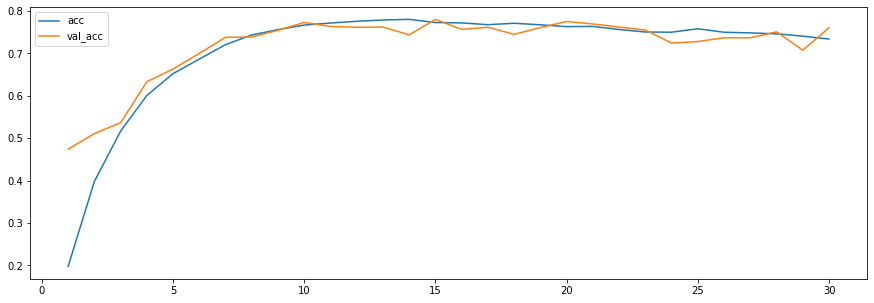

In [14]:
# 시각화

plt.figure(figsize=(15,5))

# train 데이터
plt.plot(range(1,31),
         h.history['acc'],
         label ='acc'
         )
# val 데이터
plt.plot(range(1,31),
         h.history['val_acc'],
         label ='val_acc'
         )



plt.legend()
plt.show()

In [15]:
# 모델 평가
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.6791 - acc: 0.7476


[0.6791396141052246, 0.7476000189781189]

In [16]:
# 2번 중간층 활성화 함수 relu, SGD
# 신경망의 뼈대를 설정
model2 = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
model2.add (Flatten(input_shape = (28,28)))
# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model2.add(Dense(500, activation="relu"))

# 중간층
model2.add(Dense(500,activation="relu"))   # 하나의 층
model2.add(Dense(300, activation="relu"))   # 하나의 층
model2.add(Dense(100, activation="relu"))   # 하나의 층


# 출력층
model2.add(Dense(10, activation="softmax"))   # 0~9까지의 정답레이블 (10개)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 824,410
Trainable params: 824,410
Non-trainable params: 0
________________________________________________

In [17]:
# 2. 학습/ 평가 방법 설정
model2.compile(loss ="categorical_crossentropy",
               optimizer = 'SGD',            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [18]:
h2 = model2.fit(X_train, 
              y_train_one_hot,
              validation_data = (X_val, y_val_one_hot), 
              epochs=30, 
              verbose =1)
# verbose: 학습 결과의 출력 형태를 설정하는 명령 (0: 출력 x, 1: bar 형태 (디폴트 값), 2: bar가 없는 형태로 출력)

Epoch 1/30
1407/1407 [==============================] - 5s 3ms/step - loss: nan - acc: 0.0998 - val_loss: nan - val_acc: 0.1003
Epoch 2/30
1407/1407 [==============================] - 5s 3ms/step - loss: nan - acc: 0.0999 - val_loss: nan - val_acc: 0.1003
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: nan - acc: 0.0999 - val_loss: nan - val_acc: 0.1003
Epoch 4/30
1407/1407 [==============================] - 4s 3ms/step - loss: nan - acc: 0.0999 - val_loss: nan - val_acc: 0.1003
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: nan - acc: 0.0999 - val_loss: nan - val_acc: 0.1003
Epoch 6/30
1407/1407 [==============================] - 4s 3ms/step - loss: nan - acc: 0.0999 - val_loss: nan - val_acc: 0.1003
Epoch 7/30
1407/1407 [==============================] - 4s 3ms/step - loss: nan - acc: 0.0999 - val_loss: nan - val_acc: 0.1003
Epoch 8/30
1407/1407 [==============================] - 5s 3ms/step - loss: nan - acc: 0.0999 - val_loss

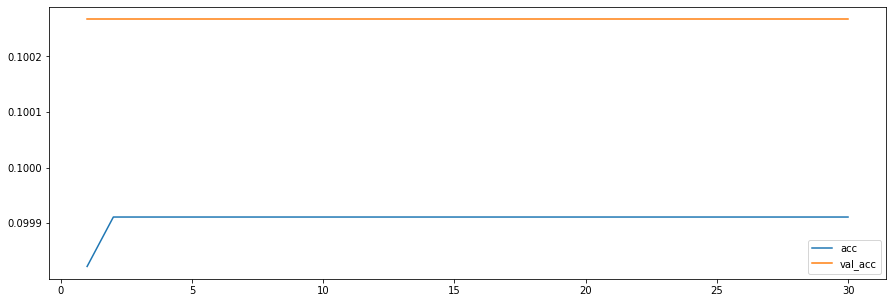

In [19]:
# 시각화
plt.figure(figsize=(15,5))

# train 데이터
plt.plot(range(1,31),
         h2.history['acc'],
         label ='acc'
         )
# val 데이터
plt.plot(range(1,31),
         h2.history['val_acc'],
         label ='val_acc'
         )



plt.legend()
plt.show()

In [20]:
# 모델 평가
model2.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: nan - acc: 0.1000


[nan, 0.10000000149011612]

In [21]:
# 3번 중간층 활성화 함수 relu, 최적화함수 adam

# 신경망의 뼈대를 설정
model3 = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
model3.add (Flatten(input_shape = (28,28)))
# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model3.add(Dense(500, activation="sigmoid"))

# 중간층
model3.add(Dense(500,activation="sigmoid"))   # 하나의 층
model3.add(Dense(300, activation="sigmoid"))   # 하나의 층
model3.add(Dense(100, activation="sigmoid"))   # 하나의 층


# 출력층
model3.add(Dense(10, activation="softmax"))   # 0~9까지의 정답레이블 (10개)

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_12 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 824,410
Trainable params: 824,410
Non-trainable params: 0
________________________________________________

In [22]:
# 2. 학습/ 평가 방법 설정
model3.compile(loss ="categorical_crossentropy",
               optimizer = 'Adam',            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [23]:
h3 = model3.fit(X_train, 
              y_train_one_hot,
              validation_data = (X_val, y_val_one_hot), 
              epochs=30, 
              verbose =1)
# verbose: 학습 결과의 출력 형태를 설정하는 명령 (0: 출력 x, 1: bar 형태 (디폴트 값), 2: bar가 없는 형태로 출력)

Epoch 1/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9415 - acc: 0.6374 - val_loss: 0.7986 - val_acc: 0.6783
Epoch 2/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8191 - acc: 0.6789 - val_loss: 0.7506 - val_acc: 0.6919
Epoch 3/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7800 - acc: 0.6912 - val_loss: 0.7220 - val_acc: 0.7215
Epoch 4/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7770 - acc: 0.6986 - val_loss: 0.8718 - val_acc: 0.6411
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.7344 - acc: 0.7072 - val_loss: 0.7542 - val_acc: 0.7091
Epoch 6/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7347 - acc: 0.7015 - val_loss: 0.7348 - val_acc: 0.7091
Epoch 7/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7205 - acc: 0.7114 - val_loss: 0.6751 - val_acc: 0.7383
Epoch 8/30
1407/1407 [==============================] - 4s 3ms

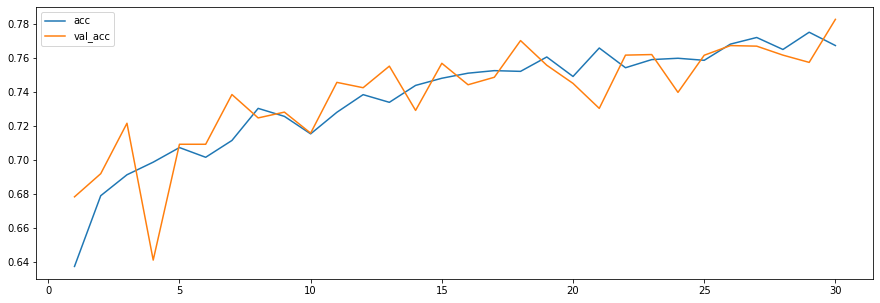

In [24]:
# 시각화

plt.figure(figsize=(15,5))

# train 데이터
plt.plot(range(1,31),
         h3.history['acc'],
         label ='acc'
         )
# val 데이터
plt.plot(range(1,31),
         h3.history['val_acc'],
         label ='val_acc'
         )



plt.legend()
plt.show()

In [25]:
# 모델 평가
model3.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.6122 - acc: 0.7643


[0.6122300028800964, 0.7642999887466431]

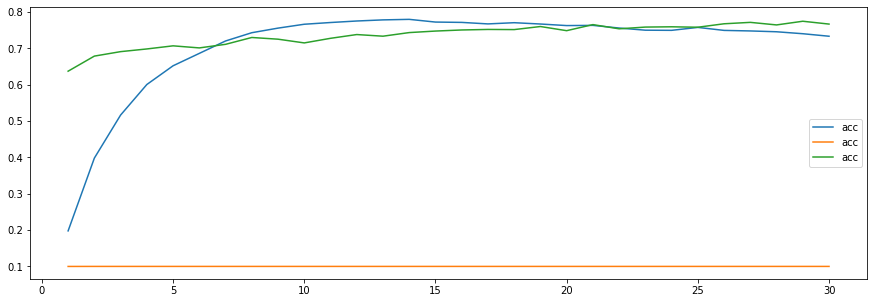

In [26]:
# 하양그래프 점점 손실값이 줄어들고있는 그래프

plt.figure(figsize=(15,5))

plt.plot(range(1,31,1),
         h.history['acc'],
         label='acc'
         )

plt.plot(range(1,31,1),
         h2.history['acc'],
         label='acc'
         )

plt.plot(range(1, 31),
         h3.history['acc'],
         label='acc'
         )
plt.legend()
plt.show()